In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [2]:
path = "C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\sdm_preprocessed.csv"
df = pd.read_csv(path)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,day_stayed
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55392 entries, 0 to 55391
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55392 non-null  object 
 1   Age                 55392 non-null  int64  
 2   Gender              55392 non-null  object 
 3   Blood Type          55392 non-null  object 
 4   Medical Condition   55392 non-null  object 
 5   Date of Admission   55392 non-null  object 
 6   Doctor              55392 non-null  object 
 7   Hospital            55392 non-null  object 
 8   Insurance Provider  55392 non-null  object 
 9   Billing Amount      55392 non-null  float64
 10  Room Number         55392 non-null  int64  
 11  Admission Type      55392 non-null  object 
 12  Discharge Date      55392 non-null  object 
 13  Medication          55392 non-null  object 
 14  Test Results        55392 non-null  object 
 15  day_stayed          55392 non-null  int64  
dtypes: f

                     Age  Billing Amount  Room Number  day_stayed
Age             1.000000       -0.003756    -0.000686    0.008347
Billing Amount -0.003756        1.000000    -0.002709   -0.005565
Room Number    -0.000686       -0.002709     1.000000   -0.005539
day_stayed      0.008347       -0.005565    -0.005539    1.000000


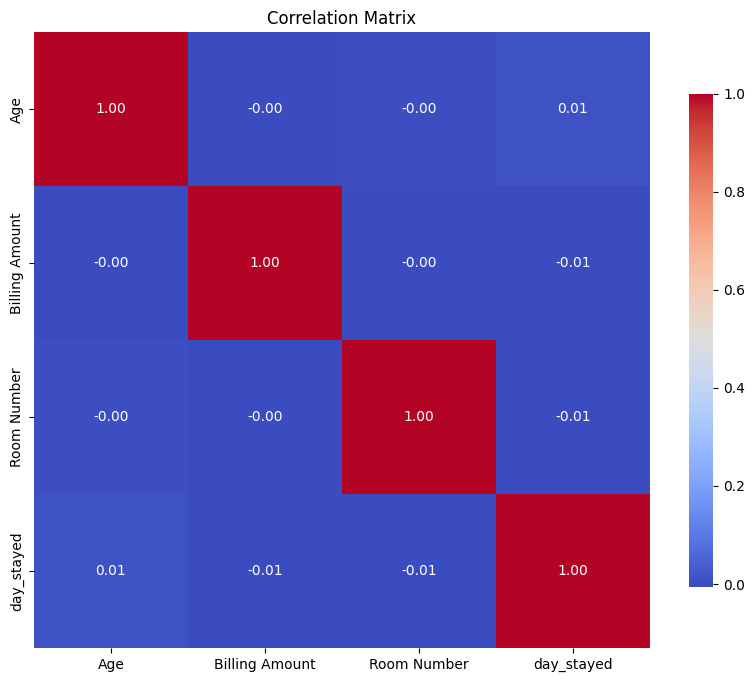

In [4]:
# Filter numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')  # Can also use 'kendall' or 'spearman'

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [5]:
unique_counts = df.nunique()
unique_counts

Name                  40167
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40276
Hospital              39815
Insurance Provider        5
Billing Amount        49904
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
day_stayed               30
dtype: int64

In [7]:
df.describe()

,Age,Billing Amount,Room Number,day_stayed
count,55392.000000,55392.000000,55392.000000,55392.000000
mean,51.538543,25590.084632,301.119205,15.508774
std,19.602045,14178.657522,115.238552,8.659552
min,13.000000,9.238787,101.000000,1.000000
25%,35.000000,13297.478682,202.000000,8.000000
50%,52.000000,25573.823359,302.000000,15.000000
75%,68.000000,37849.210062,401.000000,23.000000
max,89.000000,52764.276736,500.000000,30.000000


In [8]:
df.describe(include=object)

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55392,55392,55392,55392,55392,55392,55392,55392,55392,55392,55392,55392
unique,40167,2,8,6,1827,40276,39815,5,3,1856,5,3
top,Michael Williams,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,24,27726,6953,9297,50,27,44,11225,18618,53,11119,18589


In [6]:
dfCopy = df.copy()

In [12]:
columns_to_drop = ['Name', 'Doctor','Hospital','Date of Admission','Discharge Date','Room Number']
dfCopy= dfCopy.drop(columns=columns_to_drop)

KeyError: "['Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date', 'Room Number'] not found in axis"

In [13]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55392 entries, 0 to 55391
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55392 non-null  int64  
 1   Gender              55392 non-null  object 
 2   Blood Type          55392 non-null  object 
 3   Medical Condition   55392 non-null  object 
 4   Insurance Provider  55392 non-null  object 
 5   Billing Amount      55392 non-null  float64
 6   Admission Type      55392 non-null  object 
 7   Medication          55392 non-null  object 
 8   Test Results        55392 non-null  object 
 9   day_stayed          55392 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 4.2+ MB


In [14]:
dfCopy.nunique()

Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Insurance Provider        5
Billing Amount        49904
Admission Type            3
Medication                5
Test Results              3
day_stayed               30
dtype: int64

In [15]:
label_encoder = LabelEncoder()

In [ ]:
dfCopy['Gender'] = label_encoder.fit_transform(dfCopy['Gender'])
dfCopy['Medical Condition'] = label_encoder.fit_transform(dfCopy['Medical Condition'])
dfCopy['Blood Type'] = label_encoder.fit_transform(dfCopy['Blood Type'])
dfCopy['Insurance Provider'] = label_encoder.fit_transform(dfCopy['InsurTest Resultsance Provider'])
dfCopy['Admission Type'] = label_encoder.fit_transform(dfCopy['Admission Type'])
dfCopy['Medication'] = label_encoder.fit_transform(dfCopy['Medication'])
dfCopy[''] = label_encoder.fit_transform(dfCopy['Test Results'])

                         Age    Gender  Blood Type  Medical Condition  \
Age                 1.000000 -0.002164   -0.000374          -0.003049   
Gender             -0.002164  1.000000   -0.001030           0.000202   
Blood Type         -0.000374 -0.001030    1.000000          -0.004632   
Medical Condition  -0.003049  0.000202   -0.004632           1.000000   
Insurance Provider -0.004842 -0.002530   -0.000692          -0.004554   
Billing Amount     -0.003756  0.004452   -0.001313           0.006020   
Admission Type      0.004473  0.010230   -0.003838          -0.002053   
Medication         -0.005818  0.007488    0.002445          -0.002820   
Test Results       -0.006116  0.004923   -0.000455           0.002497   
day_stayed          0.008347  0.003610   -0.001983          -0.006151   

                    Insurance Provider  Billing Amount  Admission Type  \
Age                          -0.004842       -0.003756        0.004473   
Gender                       -0.002530        0.

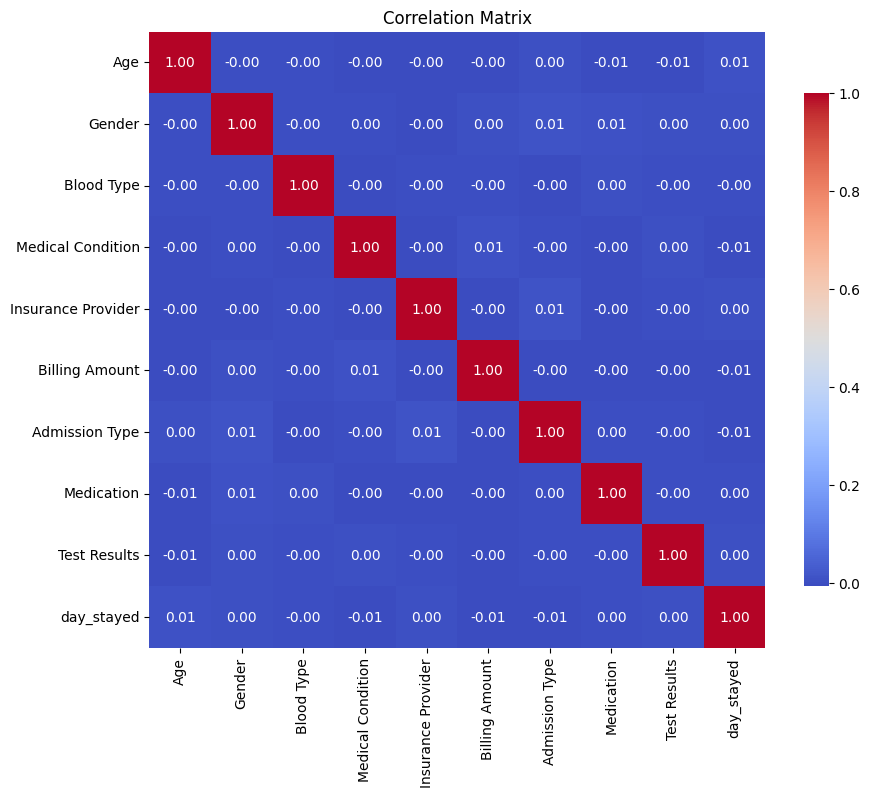

In [17]:
numerical_df = dfCopy.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')  # Can also use 'kendall' or 'spearman'

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [12]:
groups = [group['Billing Amount'].values for name, group in df.groupby('Date of Admission')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 1.172684817529002, p-value: 5.764540102560198e-07


In [ ]:
X = dfCopy.drop('Billing Amount', axis=1)  # Replace 'target_variable' with your target column name
y = dfCopy['Billing Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
X_test_real = df.drop('Billing Amount', axis = 1)
rf_predictions = rf_best_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest RMSE: 13659.08, R²: 0.08


In [22]:
# Example DataFrame (replace with your own data)
# df = pd.read_csv('your_data.csv')
X = dfCopy.drop('Billing Amount', axis=1)  # Features
y = dfCopy['Billing Amount']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Create the XGBoost regressor model
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}


In [24]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores


In [25]:
# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}


In [26]:
# Make predictions and evaluate the model
y_pred = best_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test, y_pred)
print(f"Random Forest RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")


Random Forest RMSE: 14234.05, R²: 0.00
